In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Getting Started** 

**Title : High blood pressure Prediction**
  **Hypertension (high blood pressure) is when the pressure in your blood vessels is too high (140/90 mmHg or higher). It is common but can be serious if not treated. People with high blood pressure may not feel symptoms**
  
  **High blood pressure :**

  0 -->  no
  1 -->  yes



### **DataFraming**

**Read .csv file into pandas**

## Age
> Male =>1
> Female =>0

In [2]:

data = pd.read_csv('HBP.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **Exploratory data analysis**

In [3]:
#Shape of data 
print(data.shape)
#dtypes of data 
print(data.dtypes)

(26083, 14)
age         float64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [4]:
# Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [5]:
# Checking for null values
data.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Checking Duplicates**

In [8]:
data.duplicated().sum()

0

### **Dropping Duplicates**

In [9]:
data = data.drop_duplicates()

# **Transformation**

In [10]:
# Value_counts of output
data['target'].value_counts()

target
1    14274
0    11784
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='target', ylabel='count'>

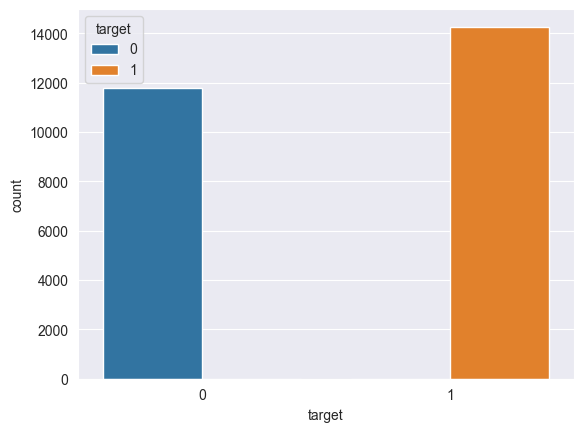

In [11]:
# output & output Count
import seaborn as sns
sns.countplot(x='target',hue='target',data=data)

<Axes: xlabel='age', ylabel='count'>

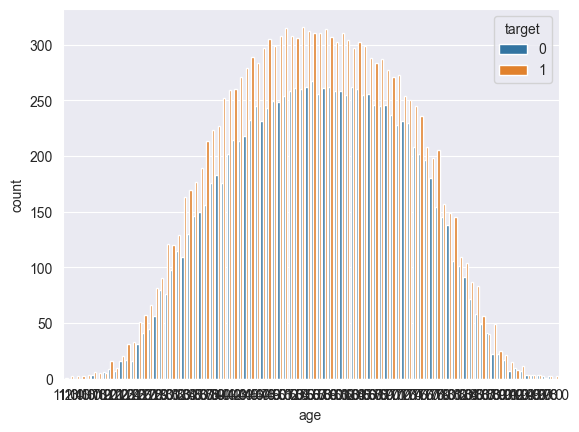

In [12]:
# age & output
import seaborn as sns
sns.countplot(x='age',hue='target',data=data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23272\370700729.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23272\370700729.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_232

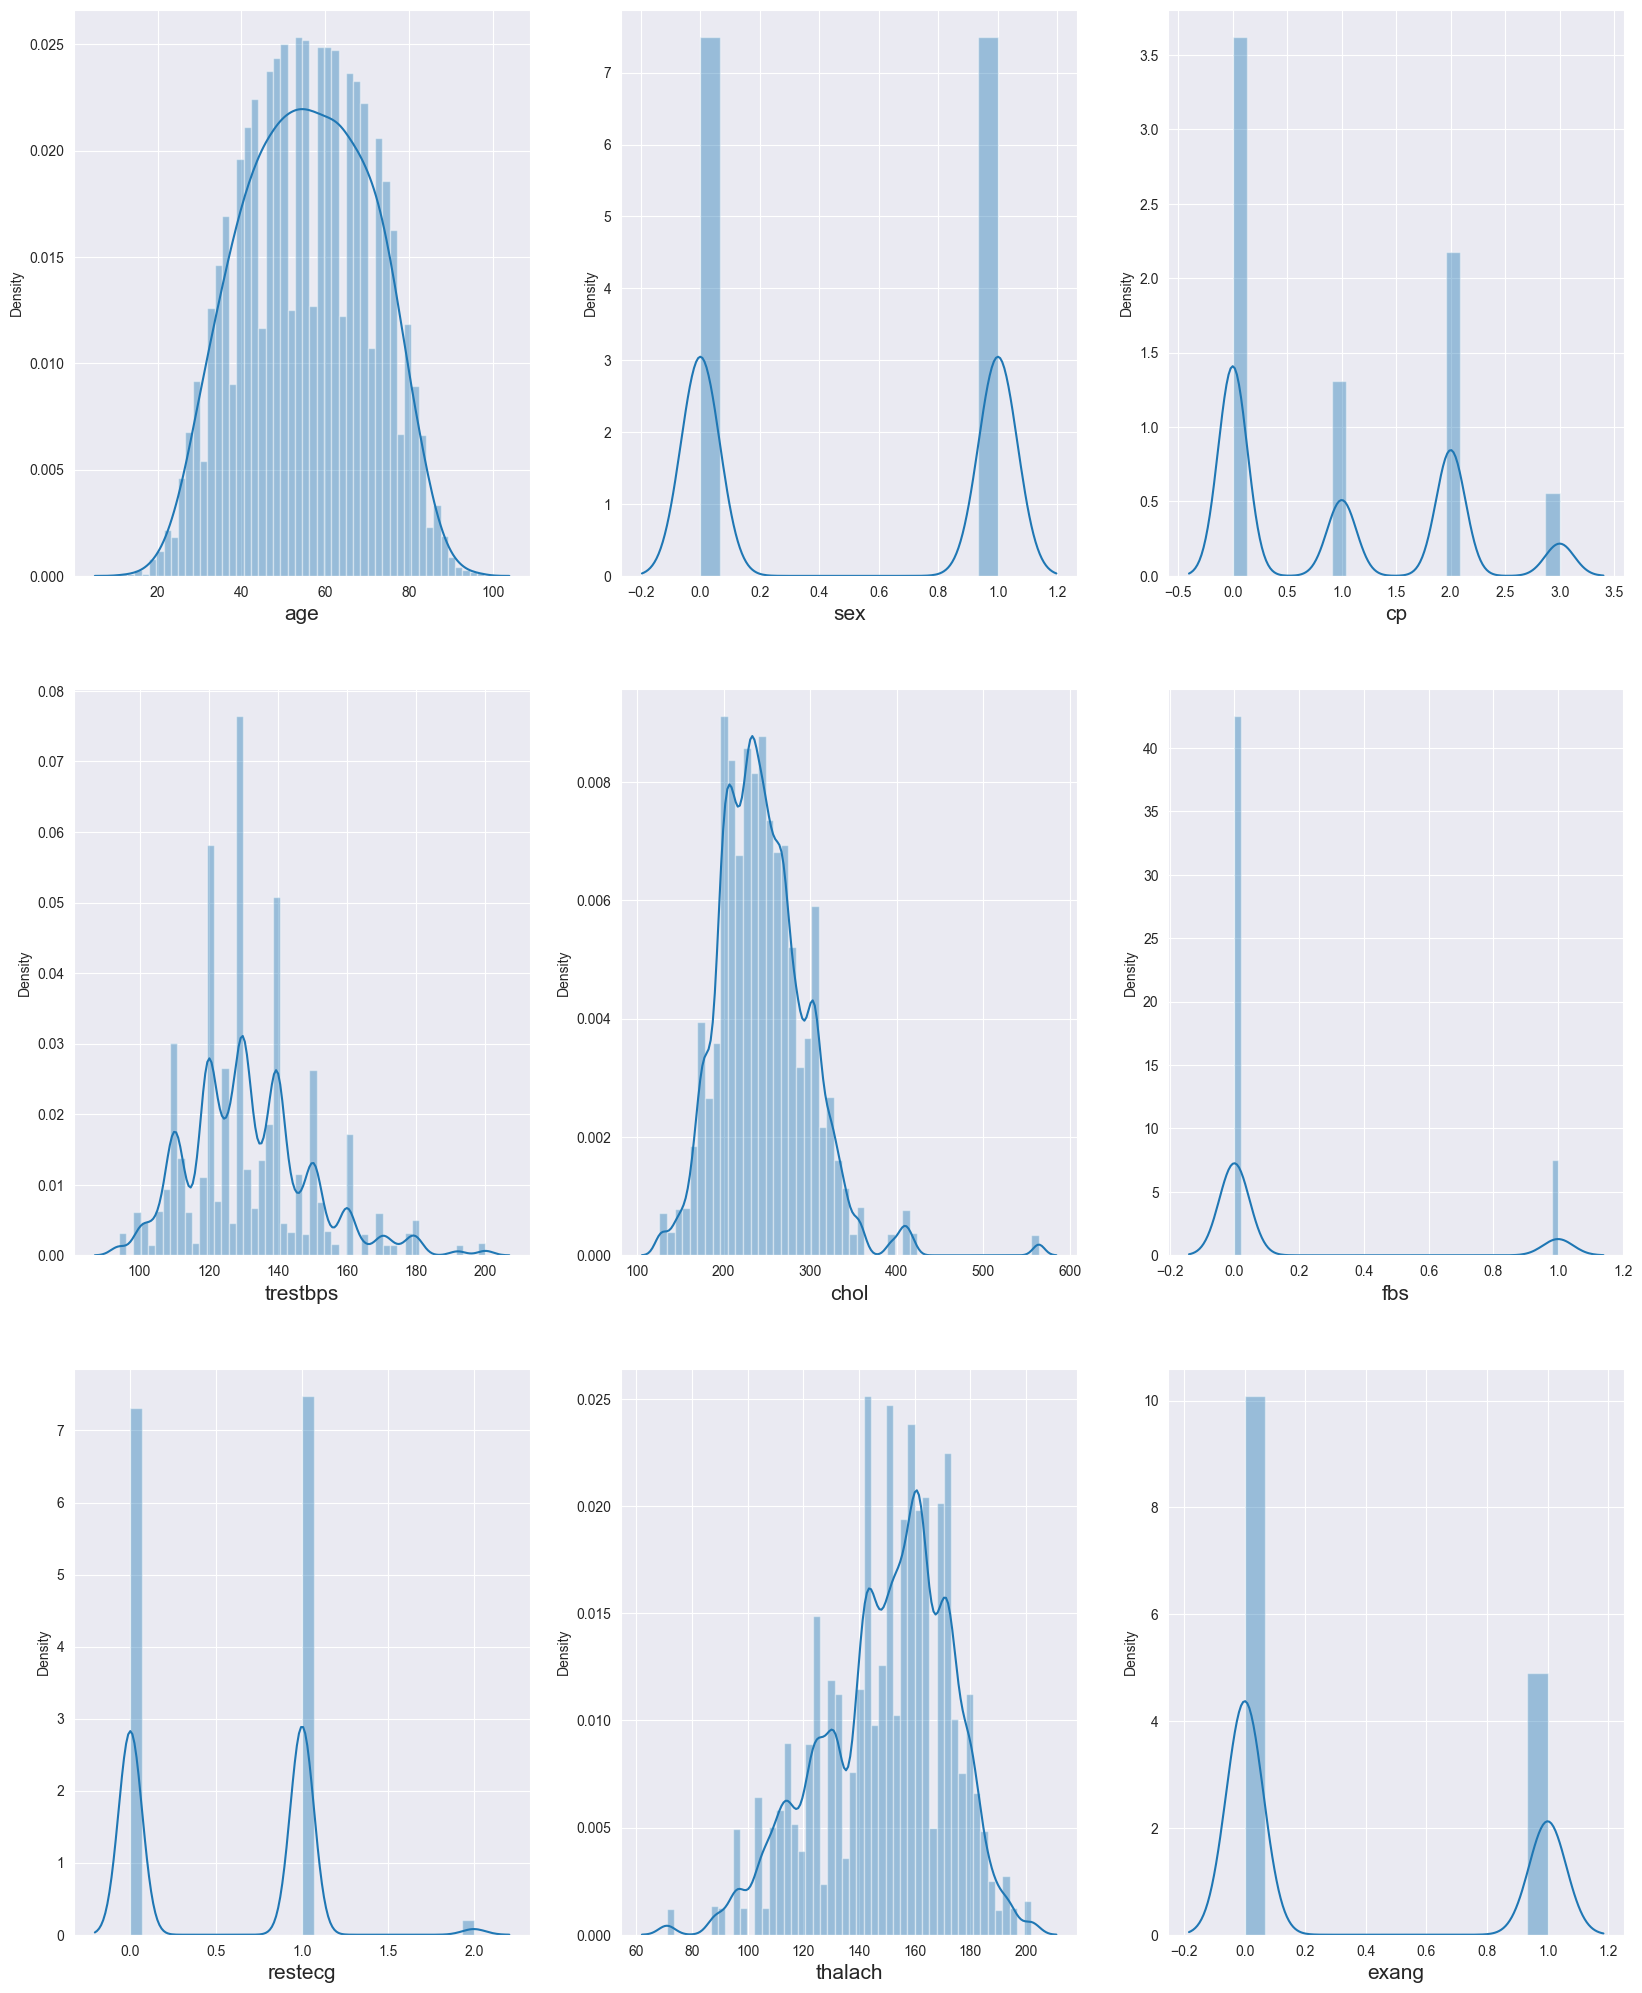

In [13]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

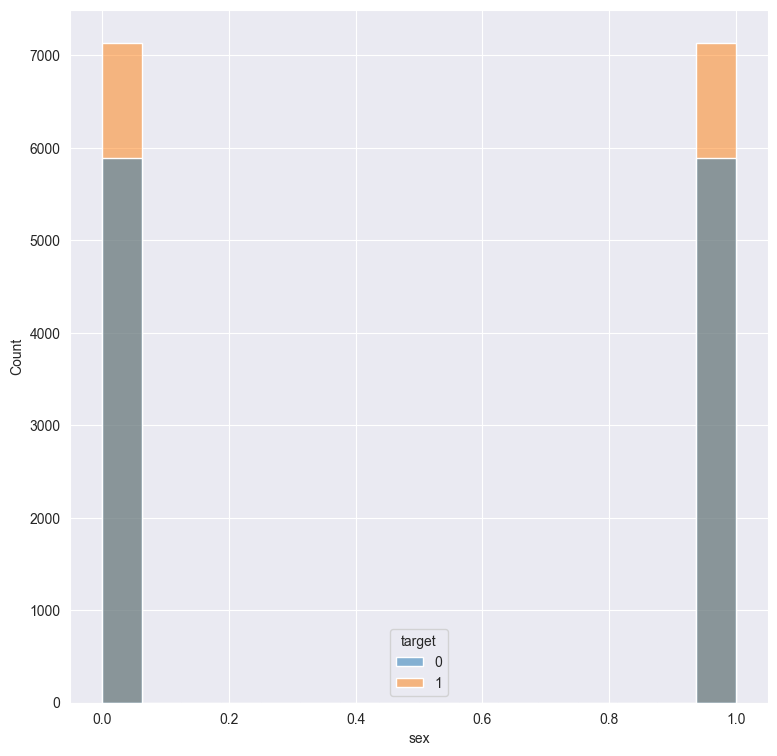

In [14]:
plt.figure(figsize=(9,9))
sns.histplot(data[['sex', 'target']], x = "sex", hue="target")
plt.title("")
plt.show()

**We can see that the distribution of data is normal ! lets move for the Model preparation.** 🚀

### Find Correlations in Data Set

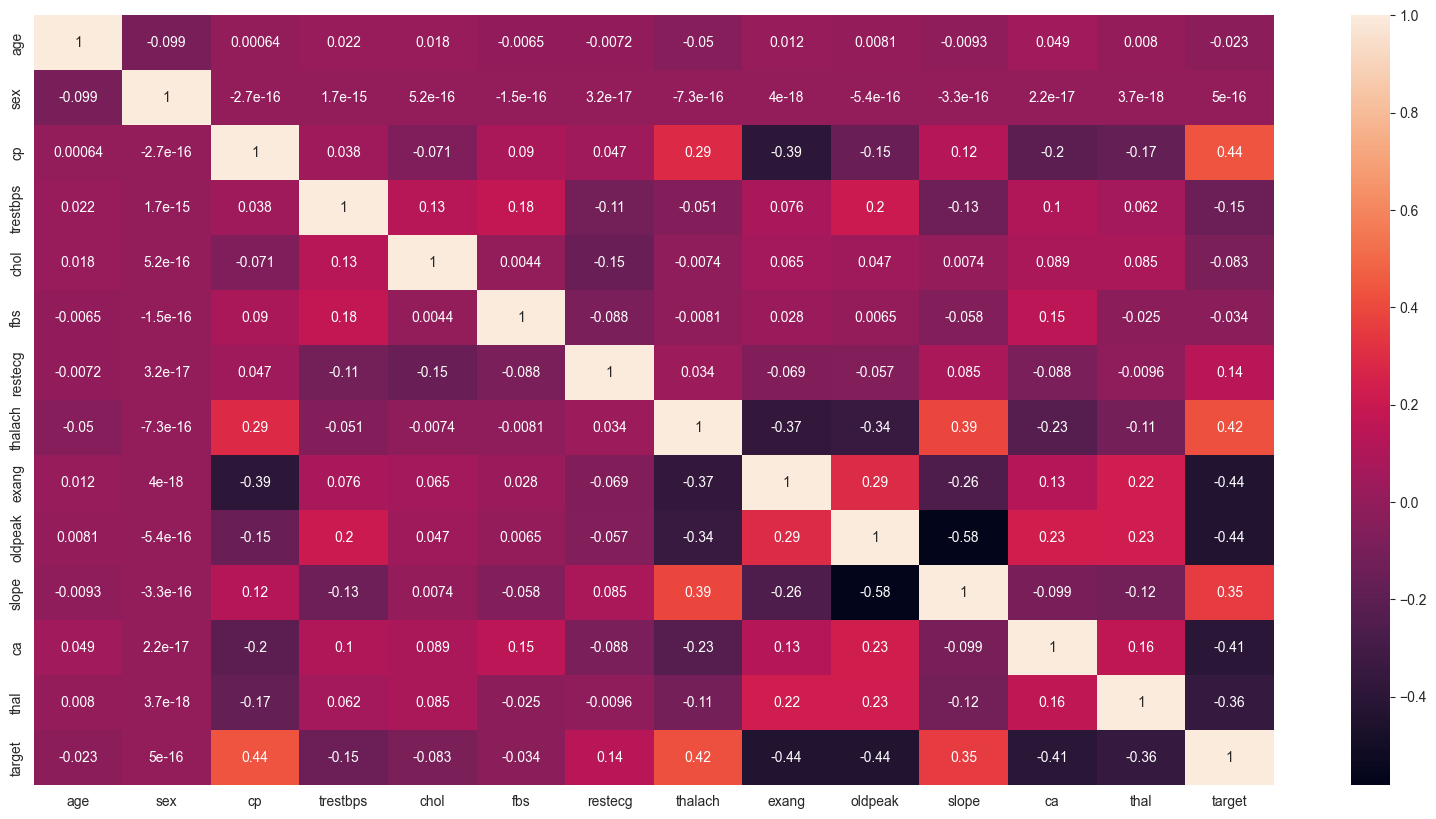

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);
plt.show()

# **Model Preparation**

Spilt into X & Y

In [16]:
# separating the data and target
X = data.drop(columns=['target'],axis=1)
y = data['target']

In [17]:
print("The shape of X is " , X.shape)
print("The shape of Y is " , y.shape)

The shape of X is  (26058, 13)
The shape of Y is  (26058,)


In [18]:
from sklearn.model_selection import train_test_split
# separating into train and testing
X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,Y_train.shape)
print("Shape of Y_test  is " ,Y_test.shape)

Shape of X_train is  (20846, 13)
Shape of X_test  is  (5212, 13)
Shape of Y_train is  (20846,)
Shape of Y_test  is  (5212,)


In [19]:
# After statify Y train & test values
print(Y_train.value_counts())
print(Y_test.value_counts())

target
1    11419
0     9427
Name: count, dtype: int64
target
1    2855
0    2357
Name: count, dtype: int64


# **Feature Scalilng**

In [20]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[ 0.48112984, -0.99961631,  0.04658699, ...,  0.96893699,
        -0.71580129, -0.52728615],
       [-0.30746145,  1.00038384,  2.0085112 , ...,  0.96893699,
        -0.71580129, -0.52728615],
       [ 1.00685736,  1.00038384,  2.0085112 , ..., -2.28572955,
        -0.71580129, -2.18218032],
       ...,
       [ 1.33543706, -0.99961631, -0.93437511, ..., -0.65839628,
         0.27081559,  1.12760802],
       [ 1.0725733 , -0.99961631,  0.04658699, ...,  0.96893699,
        -0.71580129, -0.52728615],
       [ 0.67827766, -0.99961631, -0.93437511, ..., -0.65839628,
         1.25743247,  1.12760802]])

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the training and testing data by replacing NaN values with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of RandomForestClassifier
randf = RandomForestClassifier(n_estimators=100)

# Fit the model on the imputed training data
randf.fit(X_train_imputed, Y_train)

# Make predictions on the imputed test data
y_pred = randf.predict(X_test_imputed)


In [23]:
randf.feature_importances_

array([1.19457257e-03, 1.09596740e-04, 1.63419752e-01, 8.13598636e-02,
       1.00516606e-01, 1.09561509e-02, 2.42709022e-02, 1.35904612e-01,
       5.17380020e-02, 1.17354882e-01, 5.24607740e-02, 1.27558357e-01,
       1.33155929e-01])

In [24]:
features = data.columns.values.tolist()[0:13] #Dropping Dependent Variable Heart Attack dataset
feature_pro = pd.Series(randf.feature_importances_,index=features).sort_values(ascending=False)

In [25]:
feature_pro 

cp          0.163420
thalach     0.135905
thal        0.133156
ca          0.127558
oldpeak     0.117355
chol        0.100517
trestbps    0.081360
slope       0.052461
exang       0.051738
restecg     0.024271
fbs         0.010956
age         0.001195
sex         0.000110
dtype: float64

## Feature Importances Vizualizing

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


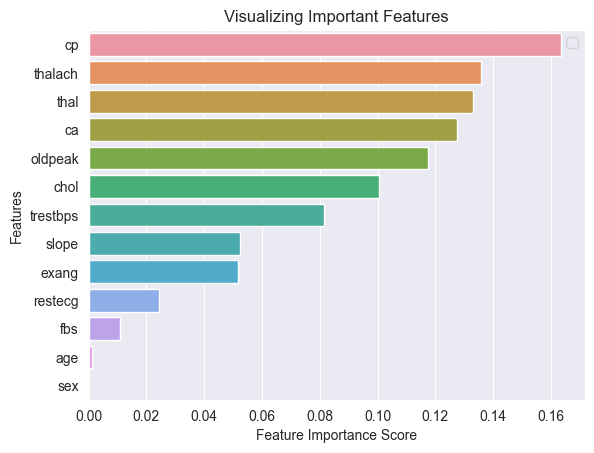

In [26]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_pro, y=feature_pro.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# **Model Training**

**We will train different model after the evaluation of model we will select out best model for production.**

1.   Logistic Regression
2.   KNN
3.   SVC
3.   Decision Tree
4.   Random Forest Regressor
5.   XgBoost
6.   Gradient Boosting


## **Logistic Regression**

In [27]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the training and testing data by replacing NaN values with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of LogisticRegression
lr = LogisticRegression()

# Fit the model on the imputed training data
lr.fit(X_train_imputed, Y_train)

# Make predictions on the imputed test data
y_pred = lr.predict(X_test_imputed)

# Calculate accuracy scores
lr_train_acc = accuracy_score(Y_train, lr.predict(X_train_imputed))
lr_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")


Training Accuracy of Logistic Regression Model is 0.8591576321596469
Test Accuracy of Logistic Regression Model is 0.8549501151189562


In [28]:
# confusion matrix 
confusion_matrix(Y_test, y_pred)

array([[1824,  533],
       [ 223, 2632]], dtype=int64)

In [29]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      2357
           1       0.83      0.92      0.87      2855

    accuracy                           0.85      5212
   macro avg       0.86      0.85      0.85      5212
weighted avg       0.86      0.85      0.85      5212



## **SVC**


In [30]:
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the training and testing data by replacing NaN values with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

svc = SVC()
svc.fit(X_train_imputed, Y_train)

y_pred = svc.predict(X_test_imputed)

svc_train_acc = accuracy_score(Y_train, svc.predict(X_train_imputed))
svc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.9818190540151588
Test Accuracy of SVC Model is 0.9858019953952417


In [31]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[2300,   57],
       [  17, 2838]], dtype=int64)

In [32]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2357
           1       0.98      0.99      0.99      2855

    accuracy                           0.99      5212
   macro avg       0.99      0.98      0.99      5212
weighted avg       0.99      0.99      0.99      5212



## **DecisionTreeClassifier**

In [33]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the training and testing data by replacing NaN values with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)



dtc = DecisionTreeClassifier()
dtc.fit(X_train_imputed, Y_train)

y_pred = dtc.predict(X_test_imputed)

dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train_imputed))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 1.0


In [34]:
# confusion matrix
confusion_matrix(Y_test, y_pred)

array([[2357,    0],
       [   0, 2855]], dtype=int64)

In [35]:
# classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2357
           1       1.00      1.00      1.00      2855

    accuracy                           1.00      5212
   macro avg       1.00      1.00      1.00      5212
weighted avg       1.00      1.00      1.00      5212



## **Hyper parameter tuning**

In [36]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the training and testing data by replacing NaN values with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

grid_params = {
    'criterion' : ['gini', 'entropy'],

    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train_imputed, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [37]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
1.0


In [38]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test_imputed)
dtc_train_acc = accuracy_score(Y_train, dtc.predict(X_train_imputed))
dtc_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 1.0
Test Accuracy of Decesion Tree Model is 1.0


**Visualization the DTC tree.**

[Text(0.49772727272727274, 0.9545454545454546, 'x[2] <= -0.444\ngini = 0.495\nsamples = 20846\nvalue = [9427, 11419]'),
 Text(0.23636363636363636, 0.8636363636363636, 'x[11] <= -0.222\ngini = 0.399\nsamples = 9863\nvalue = [7148, 2715]'),
 Text(0.13636363636363635, 0.7727272727272727, 'x[12] <= 0.3\ngini = 0.498\nsamples = 4461\nvalue = [2101, 2360]'),
 Text(0.05454545454545454, 0.6818181818181818, 'x[7] <= -1.321\ngini = 0.349\nsamples = 2608\nvalue = [588, 2020]'),
 Text(0.03636363636363636, 0.5909090909090909, 'gini = 0.0\nsamples = 137\nvalue = [137, 0]'),
 Text(0.07272727272727272, 0.5909090909090909, 'x[8] <= 0.371\ngini = 0.298\nsamples = 2471\nvalue = [451, 2020]'),
 Text(0.03636363636363636, 0.5, 'x[4] <= 1.362\ngini = 0.092\nsamples = 1596\nvalue = [77, 1519]'),
 Text(0.01818181818181818, 0.4090909090909091, 'gini = 0.0\nsamples = 1454\nvalue = [0, 1454]'),
 Text(0.05454545454545454, 0.4090909090909091, 'x[3] <= 0.196\ngini = 0.496\nsamples = 142\nvalue = [77, 65]'),
 Text(0.

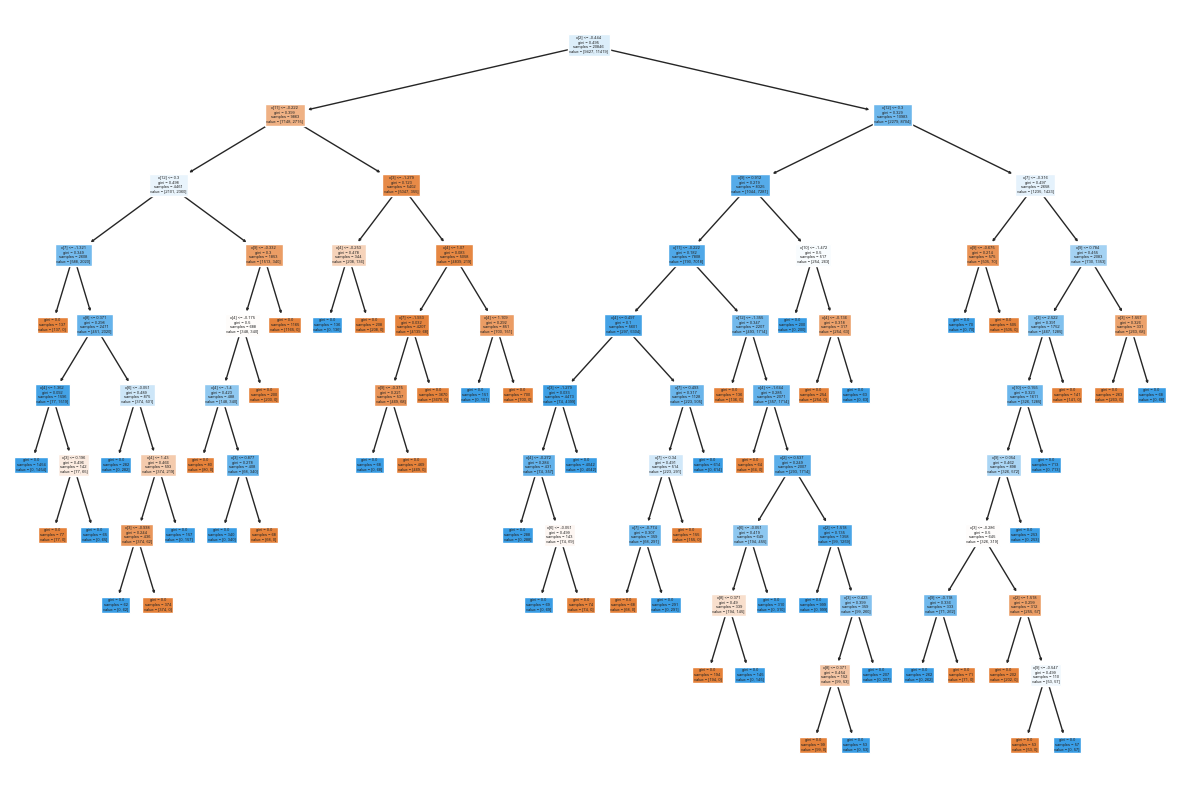

In [39]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

In [40]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## **Random Forest Classifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the training and testing data by replacing NaN values with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train_imputed, Y_train)

y_pred = rand_clf.predict(X_test_imputed)

rand_clf_train_acc = accuracy_score(Y_train, rand_clf.predict(X_train_imputed))
rand_clf_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.8707186030893217
Test Accuracy of Random Forest Model is 0.8712586339217191


## **KNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier(n_neighbors=16)
kfitModel = k_model.fit(X_train_imputed, Y_train)

# accuracy score on training data

kX_train_prediction = kfitModel.predict(X_train_imputed)
training_data_accuray = accuracy_score(kX_train_prediction,Y_train)
print('Accuracy on training data  : ', training_data_accuray)

# accuracy score on testing data
kX_test_prediction = kfitModel.predict(X_test_imputed)
kx_lgr_test_data_accuray = accuracy_score(kX_test_prediction,Y_test)
print('Accuracy on test data      : ', kx_lgr_test_data_accuray)

Accuracy on training data  :  0.9996642041638684
Accuracy on test data      :  0.9998081350729087


## **GradientBoostingClassifier**

In [43]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the training and testing data by replacing NaN values with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train_imputed, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [44]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}
1.0


In [45]:
gb = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)
gb.fit(X_train_imputed, Y_train)

y_pred = gb.predict(X_test_imputed)

gb_train_acc = accuracy_score(Y_train, gb.predict(X_train_imputed))
gb_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 1.0
Test Accuracy of Gradient Boosting Classifier Model is 1.0


In [46]:
# confusion matrix

confusion_matrix(Y_test, y_pred)

array([[2357,    0],
       [   0, 2855]], dtype=int64)

In [47]:
# classification report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2357
           1       1.00      1.00      1.00      2855

    accuracy                           1.00      5212
   macro avg       1.00      1.00      1.00      5212
weighted avg       1.00      1.00      1.00      5212



## **XGB Classifier**

In [48]:
from xgboost import XGBClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the training and testing data by replacing NaN values with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train_imputed, Y_train)

y_pred = xgb.predict(X_test_imputed)

xgb_train_acc = accuracy_score(Y_train, xgb.predict(X_train_imputed))
xgb_test_acc = accuracy_score(Y_test, y_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

Training Accuracy of XGB Model is 0.8593015446608462
Test Accuracy of XGB Model is 0.8551419800460476


In [49]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Gradient Boosting', 'XgBoost']
scores = [lr_test_acc, kx_lgr_test_data_accuray, svc_test_acc, dtc_test_acc, rand_clf_test_acc,gb_test_acc, xgb_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree,1.000000
5,Gradient Boosting,1.000000
1,KNN,0.999808
2,SVC,0.985802
4,Random Forest,0.871259
6,XgBoost,0.855142
0,Logistic Regression,0.854950


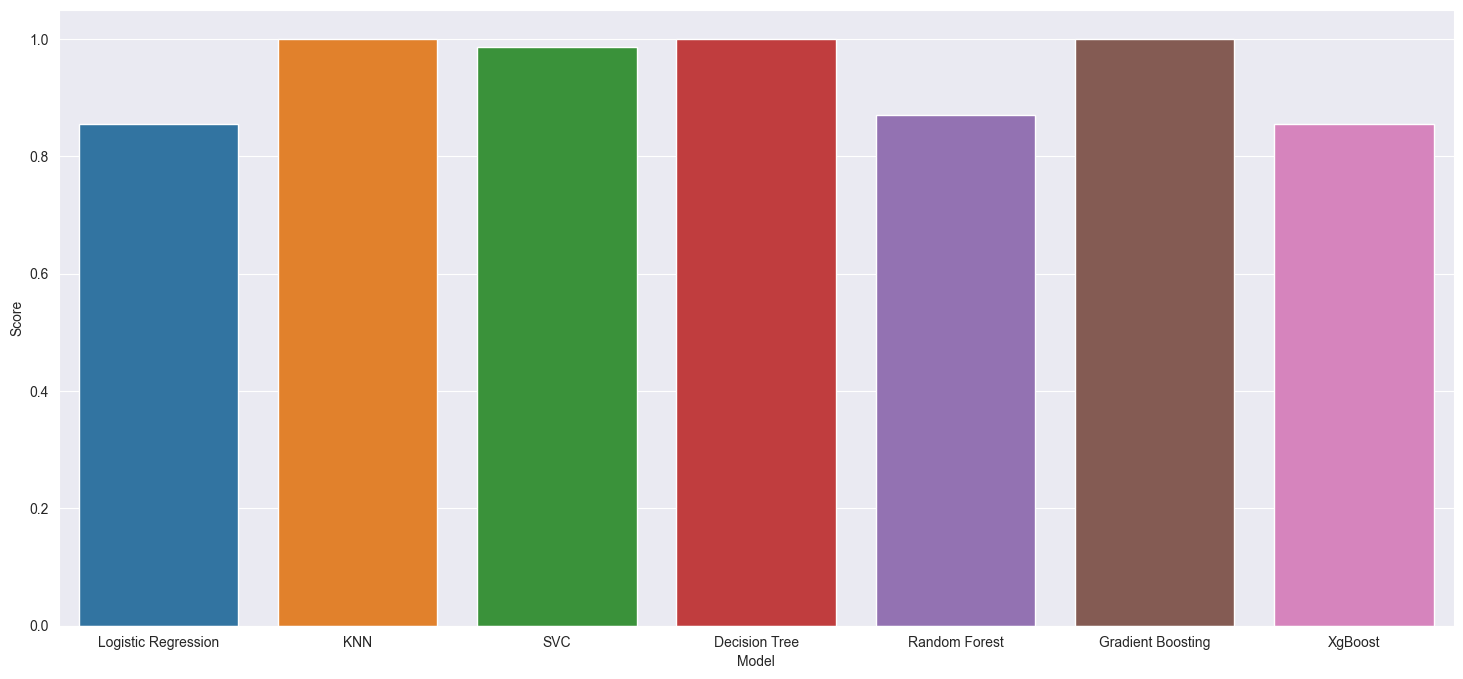

In [50]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

### ***SVC gives us the best result so we will save this model for production but it overfited then i select Random Forest .***

In [51]:
import pickle

In [52]:
# save the model to disk
filename = 'HBP_model.sav'
pickle.dump(models, open(filename, 'wb'))


In [53]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

,Model,Score
0,Logistic Regression,0.854950
1,KNN,0.999808
2,SVC,0.985802
3,Decision Tree,1.000000
4,Random Forest,0.871259
5,Gradient Boosting,1.000000
6,XgBoost,0.855142


## Create Pickle File for  DecisionTreeClassifier Model

In [54]:
import pickle
# open a file, where you ant to store the data
file = open('HBP_model.pkl', 'wb')

# dump information to that file
# lr
# svc
# dtc -
# grid_search
# k_model
# gb
# xgb
pickle.dump(dtc, file)  #Selecting Random Forest as the Model because of Giving highest Accuracy after svc

In [55]:
#Reading the Pickle file for to certify model was imported Successfully
model = open('HBP_model.pkl','rb')
lrModel= pickle.load(model)

In [56]:
# Prediction Parameters testing using the imported Model

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data
imputer.fit(X_train)

# Transform the training and testing data by replacing NaN values with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

y_prediction = lrModel.predict(X_test_imputed)

In [57]:
svc_acc = accuracy_score(Y_test, y_prediction)

In [58]:
svc_acc

1.0

In [59]:
## Example for Predicting the Heart Attack Analysis
import numpy as np

 #More chance
X_New = [76.0,1.0,0,112,212,0,0,132,1,0.1,2,1,2]
X_New = np.reshape(X_New, (1, -1))

y_New = lrModel.predict(X_New)


#Less chance
X_2 = [68.0,1.0,0,130,131,0,1,115,1,1.2,1,1,3]
X_2 = np.reshape(X_2, (1, -1))

y_2 = lrModel.predict(X_2)

In [60]:
print(y_New)

[0]


In [61]:
print(y_2)

[1]


## ***.hy file***

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

In [65]:
# Save the model to a .hy file
file = open('HBP_model.hy', 'wb')
joblib.dump(rand_clf, file)
# file.close()

# Load the model from the .hy file
model = open('HBP_model.hy', 'rb')
loaded_model = joblib.load(model)
# model.close()

# Assuming X_test is your test data
predictions = loaded_model.predict(X_test)

In [66]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy of the loaded model is {accuracy}")

Accuracy of the loaded model is 0.8712586339217191


**So this will Verify that Our Imported hy file provides the desired out put for the Heart Attack Analysis & Prediction Dataset for Prdiction Purpose**

In [67]:
import numpy as np
import joblib

In [68]:
loaded_model = joblib.load('HBP_model.hy')

In [69]:
X_New = np.array([55,1,0,140,217,0,1,111,1,5.6,0,0,3])
X_New = np.reshape(X_New, (1, -1))

In [70]:
y_New = loaded_model.predict(X_New)

In [71]:
if y_New == 0:
    print("Less chance of heart attack")
else:
    print("More chance of heart attack")

Less chance of heart attack
